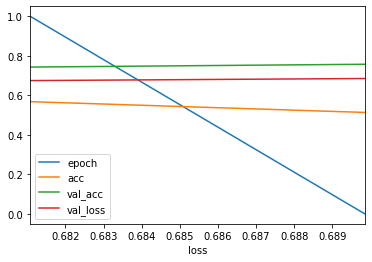

Exception in Tkinter callback
Traceback (most recent call last):
  File "/software/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-13-9c0c55c0bb52>", line 184, in run_gpu
    file = pd.read_csv('plottxt1')
  File "/software/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 685, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/software/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 457, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/software/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 895, in __init__
    self._make_engine(self.engine)
  File "/software/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1135, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/software/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1917, in __init__
    self._reader = parsers.Text

In [ ]:
from tkinter import *
from tkinter.ttk import *
from tkinter import filedialog
from PIL import Image, ImageTk
from tkinter.filedialog import asksaveasfile
from tkinter.filedialog import asksaveasfilename
from subprocess import Popen, PIPE, getstatusoutput
import pandas as pd
import matplotlib.pyplot as plt
import tkinter.font as font
import subprocess
#import datetime


import tkinter as tk
import os
import sys
os.environ['DISPLAY']='localhost:10.0'


#web window
window = Tk()

window.title("NT3 Application")

window.geometry('1200x600') #widthXheight

myFont = font.Font(family='Helvetica', size=16, weight='bold') 
myFont1 = font.Font(family='Helvetica', size=12, weight='bold')    


space_label0 = Label(window, text= "", font='Helvetica 11 bold')
space_label0.grid(column=0, row=0)

space_label1 = Label(window, text= "", font='Helvetica 11 bold')
space_label1.grid(column=0, row=1)

space_label2= Label(window, text= "", font='Helvetica 11 bold')
space_label2.grid(column=0, row=3)

space_label3= Label(window, text= "", font='Helvetica 11 bold')
space_label3.grid(column=0, row=4)

space_label4= Label(window, text= "", font='Helvetica 11 bold')
space_label4.grid(column=0, row=8)

#Results_textbox
results_label= Label(window, text= "Result", font='Helvetica 11 bold')
results_label.grid(column=2, row=6)

results_textbox = Text(window, height=20, width=50,font='Helvetica 11 bold')
results_textbox.grid(column=2, row=7,sticky=tk.N+tk.W)

#Name_textbox
name_label = tk.Label(window,text= "File Name:", font=myFont1)
name_label.grid(column=1, row=5,sticky=tk.N+tk.E)

name_textbox = Text(window, height=1, width=30,font=myFont )
name_textbox.grid(column=2, row=5,sticky=tk.N+tk.W)

#temperaryplotbox
tempplot_textbox = Text(window, height=20, width=50, font='Helvetica 11 bold' )
tempplot_textbox.grid(column=1, row=7,sticky=tk.N+tk.W)


#function run a model called by run_btn
def run_model():
    s=name_textbox.get(1.0,"end-1c")
    with Popen("python "+s, shell=True, stdout=PIPE, bufsize=20, universal_newlines=True) as p:
        for line in p.stdout:
            results_textbox.insert(END, line)
   
    %cp training.log plottxt              
    file = pd.read_csv('plottxt')
    file.plot.line('loss');
    plt.savefig("PLOT.png")
    

    
    
def run_back(): 
    %run startNvidia.ipynb
    
def insert_plot():
    imgToInsert=tk.PhotoImage(file ="PLOT.png")
    tempplot_textbox.image_create(tk.END,image=imgToInsert)
    window.mainloop()

#save file function"
def save_file1():
    window.attributes('-topmost',False)
    data = results_textbox.get("1.0", "end-1c")
    save_text = filedialog.asksaveasfilename(
    defaultextension="txt", filetypes=[("Text Files", "*.txt"),
                                       ("All Files", "*.*")],)
    if save_text:
        with open(save_text, "w") as f:
            f.write(data)
            f.close()
           

        
def save_file2():
    window.attributes('-topmost',False)
    image = Image.open("PLOT.png")
    photo = ImageTk.PhotoImage(image)
    a = image.filename = asksaveasfilename(initialdir = os.getcwd(),title = "Select file",filetypes = (('JPEG', ('*.jpg','*.jpeg','*.jpe','*.jfif')),('PNG', '*.png'),('BMP', ('*.bmp','*.jdib')),('GIF', '*.gif')))
    image.save(a)

         

    
def run_para():
      
    ws = Tk()
    ws.attributes('-topmost',True)
    ws.title("Change Parameters")
    ws.geometry("500x500")
    ws['bg']='#fb7'
    ws.lift()
    def openFile():
        ws.attributes('-topmost',False)
        tf = filedialog.askopenfilename(
            initialdir= os.getcwd(),
        title="Open Text file",
        filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")],)
       
        pathh.insert(END, tf)
        tf = open(tf,'r')  # or tf = open(tf, 'r')
        data = tf.read()
        txtarea.insert(END, data)
        tf.close()
        ws.attributes('-topmost',True)
       
    def save_file():  
        ws.attributes('-topmost',False)
        data = txtarea.get("1.0", "end-1c")
        save_text = filedialog.asksaveasfilename(
            defaultextension="txt",
            filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")],
        )
        if save_text:
            with open(save_text, "w") as f:
                f.write(data)
        f.close()
       

    txtarea = Text(ws, width=60, height=20, font='Helvetica 11 bold')
    txtarea.pack(pady=20)

    pathh = Entry(ws)
    pathh.pack(side=LEFT, expand=True, fill=X, padx=20)
   
    ws.attributes('-topmost',False)
    #Create a button
    Button(ws, text= "Save File", command= save_file
    ).pack(side=RIGHT, expand=True, fill=X, padx=10)
   
    Button(
    ws,
    text="Open File",
    command=openFile
    ).pack(side=RIGHT, expand=True, fill=X, padx=10)
   
    ws.mainloop()

def clear_fun():
    tempplot_textbox.delete("1.0","end")
    results_textbox.delete("1.0","end")
    name_textbox.delete("1.0","end")


#run2 GPU
def run_gpu():
    %run killNvidia.ipynb
    wss = tk.Toplevel()
    wss.attributes('-topmost',True)
    wss.title("GPU (NIVIDIA-SMI RUN)")
    wss.geometry("500x500")
    wss['bg']='#fb7'
    wss.lift()
    
    %cp gpu.log plottxt1              
    file = pd.read_csv('plottxt1')
    #x = [datetime.datetime.now() + datetime.timedelta(seconds=i) for i in range(1200)]
    file.plot.line('utilization.gpu');
    plt.savefig("PLOT1.png")
    imgToInsert1=tk.PhotoImage(file ="PLOT1.png")
    
    def insert_gpu():
        txtarea1.image_create(tk.END,image=imgToInsert1)

    def openFile():
        wss.attributes('-topmost',False)
        tf = filedialog.askopenfilename(
            initialdir= os.getcwd(),
        title="Open Text file",
        filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")],)
       
        pathh1.insert(END, tf)
        tf = open(tf,'r')  # or tf = open(tf, 'r')
        data = tf.read()
        txtarea1.insert(END, data)
        tf.close()
        wss.attributes('-topmost',True)
       
    def save_file():  
        window.attributes('-topmost',False)
        image = Image.open("PLOT1.png")
        photo = ImageTk.PhotoImage(image)
        a = image.filename = asksaveasfilename(initialdir = os.getcwd(),title = "Select file",filetypes = (('JPEG', ('*.jpg','*.jpeg','*.jpe','*.jfif')),('PNG', '*.png'),('BMP', ('*.bmp','*.jdib')),('GIF', '*.gif')))
        image.save(a)
       

    txtarea1 = tk.Text(wss, width=60, height=20, font='Helvetica 11 bold')
    txtarea1.pack(pady=20)

    pathh1 = Entry(wss)
    pathh1.pack(side=LEFT, expand=True, fill=X, padx=20)
   
    wss.attributes('-topmost',False)
    #Create a button
    tk.Button(wss, text= "Save File", command= save_file
    ).pack(side=RIGHT, expand=True, fill=X, padx=10)
   
    tk.Button(
    wss,
    text="Open File",
    command=openFile
    ).pack(side=RIGHT, expand=True, fill=X, padx=10)
    

    tk.Button(
    wss,
    text="Show Plot",
    command=insert_gpu
    ).pack(side=RIGHT, expand=True, fill=X, padx=10)
    
    imgToInsert1=tk.PhotoImage(file ="PLOT1.png")
   

    wss.mainloop()

   
    
#Plot    
plot_label= tk.Label(window, text= "Plot", font='Helvetica 11 bold')
plot_label.grid(column=1, row=6)   

#imgToInsert=tk.PhotoImage(file ="PLOT.png")

#Run_button
run_btn = tk.Button(window,text="RUN",font=myFont,command = run_model)
run_btn['font'] = myFont
run_btn.grid(column=3, row=5,sticky=tk.N+tk.W)

#GPU Plot the model
start_btn = tk.Button(window, text= "START",font=myFont,command=run_back)
start_btn['font'] = myFont
start_btn.grid(column=1, row=3,sticky=tk.N+tk.E)

end_btn = tk.Button(window,text= "STOP",font=myFont, command= run_gpu)
end_btn['font'] = myFont
end_btn.grid(column=2, row=3,sticky=tk.N+tk.W)

para_btn = tk.Button(window, text="Change Parameters", command = run_para)
para_btn.grid(column=2, row=11,sticky=tk.N+tk.W)

#Save_button
save_btn = tk.Button(window, text="Save Results to File", command = save_file1)
save_btn.grid(column=2, row=10,sticky=tk.N+tk.E)

#SavePolt_button
saveplot_btn = tk.Button(window, text="Save Plot to File", command = save_file2)
saveplot_btn.grid(column=1, row=11,sticky=tk.N+tk.W)

#Clear_button
clear_btn = tk.Button(window, text="Clear", command = clear_fun)
clear_btn.grid(column=2, row=11,sticky=tk.N+tk.E)

#insert_plot Button
insertPlot_btn = tk.Button(window, text="Show Plot", command = insert_plot)
insertPlot_btn.grid(column=1, row=10,sticky=tk.N+tk.W)


window.mainloop()